In [51]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
xrange = range

[ 0.99998818  0.97858206  0.9939474   0.99527305  0.97664253  0.88009029
  0.96369078  0.88107786  0.87419533  0.89102133  0.88478909  0.62432098
  0.67753535  0.87065513  0.80799659  0.47499023  0.33901037  0.63997806
  0.706503    0.40741552  0.62772628  0.35879702  0.79241584  0.27394814
  0.65106828  0.09760722  0.10631895  0.16160119  0.06720605  0.55627321
  0.20704542  0.19438989  0.21804827 -0.14710005  0.05947254 -0.27185529
 -0.14413962 -0.20401355 -0.10291928 -0.13900481 -0.22622797  0.05217271
 -0.56058408 -0.36276794 -0.28912912 -0.54022402 -0.65739868 -0.55933548
 -0.45747773 -0.56816322 -0.73316318 -0.66622177 -0.74018771 -0.42819688
 -0.77672113 -0.8335872  -0.74254471 -0.53419802 -0.87974525 -0.92338394
 -0.81693285 -0.84716836 -0.96208465 -0.94453457 -0.94415753 -0.85253347
 -0.99426515 -0.82091848 -0.94076271 -0.99117656 -0.95180594 -0.98947535
 -0.96485802 -0.99987187 -0.91447154 -0.97644851 -0.99968717 -0.9937812
 -0.93290486 -0.91855211 -0.87621155 -0.99999807 -0.

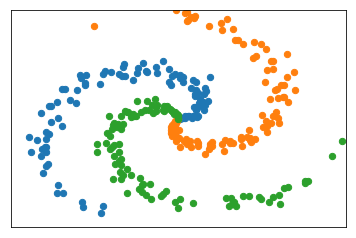

In [78]:
N = 100 # số điểm cho từng class
d0 = 2 # số chiều
C = 3 # số class
x = np.zeros((d0, N*C))  # data matrix
y = np.zeros(N*C) # class label

for j in range(C):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0, 1, N) # Ban kinh
    t = np.linspace(j*4, (j+1) * 4, N) + np.random.randn(N)*0.2 
    x[:,ix] = np.c_[r*np.cos(t),r* np.sin(t)].T
    y[ix] = j

plt.scatter(x[0, :N], x[1, :N], s =40)
plt.scatter(x[0, N:2*N], x[1, N:2*N], s = 40)
plt.scatter(x[0, 2*N:], x[1, 2*N:], s = 40)

plt.xlim([-1, 1])
plt.ylim([-1, 1])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

print (np.sin(t))

In [79]:
def softmax(V):
    b = np.max(V)
    Z = np.exp(V - b) / sum(np.exp(V- b))
    return Z

def convert_label(y , C = C):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/ Y.shape[1]
    

In [1]:
d0 = 2
d1 = h = 200  # size of hidden layer
d2 = C = 3  # output 

W1= 0.01*np.random.randn(d0 ,d1) # tao W ngau nhien 
b1 = np.zeros((d1, 1))# tao b = 0
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_label(y, C) #one-hot coding
N = x.shape[1]
eta = 2 # learning rate
for i in xrange(1000):
    Z1 = np.dot(W1.T, x) +b1 
    A1 = np.maximum(Z1, 0) # relu
    Z2 = np.dot(W2.T, A1) +b2
    
    Yhat = softmax(Z2) # Y-pred
    
    loss = cost(Y, Yhat) # ham mat mat
    
    if i %1000 == 0:
        print('iter%d, loss: %f' %(i, loss))
    # Backpropagation    
    E2 = (Yhat - Y)/N  
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0
    dW1 = np.dot(x, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    # weight, bias 
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

Z1 = np.dot(W1.T, x ) +1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) +b2
predicted_class = np.argmax(Z2, axis = 0) # du doan label cua du lieu 
acc = (100 * np.mean(predicted_class == y)) # tinh % chinh xac cua bai toan
print('training accuracy: %.2f%%' % acc)

xm = np.arange(-1.5, 1.5,0.025 )
xlen = len(xm)
ym = np.arange(-1.5, 1.5 , 0.025)
xx, yy = np.meshgrid(xm, ym)

xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

print(xx.shape, yy.shape)



x0 = np.vstack((xx1, yy1))

Z1 = np.dot(W1.T, x0) + b1 # y = WX + b
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2 # 
Z = np.argmax(Z2, axis=0)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap ='jet', alpha = .1)

N = 100
print(N)

plt.scatter(x[0, :N], x[1, :N], s =40)
plt.scatter(x[0, N:2*N], x[1, N:2*N], s = 40)
plt.scatter(x[0, 2*N:], x[1, 2*N:], s = 40)
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(x[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()

NameError: name 'np' is not defined

In [82]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

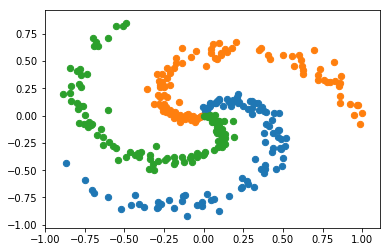

In [92]:
N = 100 # so du lieu
d0 = 2 # so chieu
C = 3 # class
x = np.zeros((d0, N*C))
y = np.zeros((N*C))

for j in range(C):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0, 1, N)
    t = np.linspace(j*4, (j+1) *4, N)+np.random.randn(N)*0.2
    x[:, ix] = np.c_[(r*np.sin(t), r*np.cos(t))].T
    y[ix] = j
plt.scatter(x[0,:N], x[1,:N], s =40)
plt.scatter(x[0, N:2*N], x[1, N:2*N], s = 40)
plt.scatter(x[0, 2*N:3*N], x[1, N*2:N*3], s = 40)
plt.xlim

In [94]:
def softmax(V):
    b = np.max(V)
    Z = np.exp(V - b)/ sum(np.exp(V-b))
    return Z

def convert_label(y, C=C):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape(C, len(y))).toarray()
    return Y

def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [95]:
d0 = 2 
d1 = h = 200
d2 = C = 3

W1 = 0.01*np.random.randn((d0, d1))
b1 = np.zeros((d1, 1))
W2 = 0.01* np.random.randn((d0, d2))
b2 = np.zeros((d2, 2))
# convert_label
Y = convert_label(y, C)
N = x.shape[1]
eta = 2
for i in xrange(10000):
    Z1 = np.dot(W1.T, x) +b1
    A2 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A2) +b2

    Yhat = softmax(Z2)
    
    loss = cost(Y                    , Yhat)

SyntaxError: unexpected EOF while parsing (<ipython-input-95-7fc1ac9aeb50>, line 13)